Points to be covered:

* What is time series?
* Time series components
* Check for stationary
* Treating stationary

Bonus 
* fitting the data to sarimax model

## What is time series?

Time series is data based on date time. In machine learning, we have a requirement to predict future based on time like feature like, Dates, months, time, year etc. For such cases we have several Time series algorithms, similar to regression and classification algorithms.

In time series data analysis there are some other components need to be analysed from the data, which is quite different from analysis we do for regression and classification

We will understand this along with implementation

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
#Loading air passenger data
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
#renaming the column name
df = df.rename({'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'monthly_totals'}, axis=1)

In [4]:
#finding unique values
df['Month'].unique()

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10', '1949-11', '1949-12',
       '1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06',
       '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12',
       '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06',
       '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12',
       '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06',
       '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12',
       '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06',
       '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12',
       '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06',
       '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12',
       '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
       '1955-07', '1955-08', '1955-09', '1955-10', 

In [5]:
#dropping the string value from data
df.drop(df.index[df['Month'] == 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], inplace = True)

In [6]:
#Converting month to date time
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
#rename month to date. because when we converted month to date time it came as date
df.rename(columns = {'Month':'Date'}, inplace = True)
df.head()

,Date,monthly_totals
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [8]:
#set index as date for time series analysis
df.set_index('Date', inplace=True)

In [9]:
#sort the data
df.sort_index(inplace=True)

<AxesSubplot:xlabel='Date'>

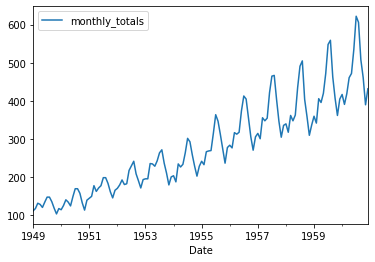

In [10]:
#plot the data
#look closely in the graph we will be discussing few components in the time series
df.plot()

So in Time series analysis we have to check whether these components are present in the data or not.

* Level: Level is them Mean/Average of the data.Our model will benefit more from the level than the Trend, seasonality or noise.

* Trend: Increase or decrease slope in the data. It can be linear or non linear. And how we know that? Just by plotting. see the above diagram. The graph shows data increases based on time. So it has a upward trend.

* Seasonality: Any thing that has a repetitive pattern for fixed period of time or regular intervals. The regular intervals could be year, month, week, anything. eg: the sale of icecream happens more in summer and low in winter. this is repetitive.

* Cyclic Patterns: Cyclic pattern is also a repetitive pattern of the data but it doesnt occurs in fixed period of time. Like waking up at a certain time in the morning, traffic of certain area. These are repetitive pattern that continuously repeats more than a year or long.

* Noise: The variations which do not show any pattern at all. It just has random fluctuations

* Signal: Signal is the real pattern, the repeatable process/pattern in data.

## Trend and seasonality
Before  moving it to modelling, we have to check these components. And treat few components in data

How to find trend and seasonality in data?

It is usually found through plotting the graph, where we can see an upward trend, and seasonality.
Or we can use automatic decompose to get better depth of trend and seasonality visual.

<AxesSubplot:xlabel='Date'>

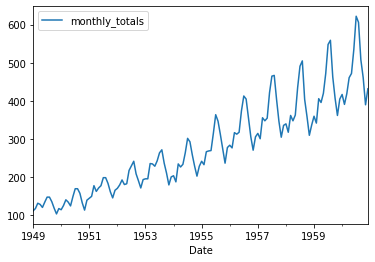

In [11]:
#Trend - the line graph is moving upward, so it is upward trend. if it moves downward then it is downward trend
# Seasonality - We can see the repetitive pattern every year, 1949- 1950 we can see a spike and drop. similarly for every year
df.plot()

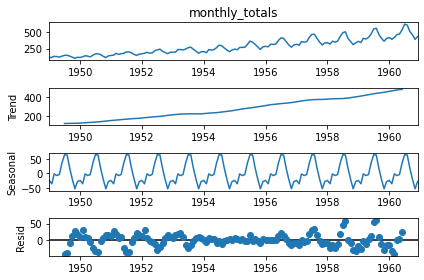

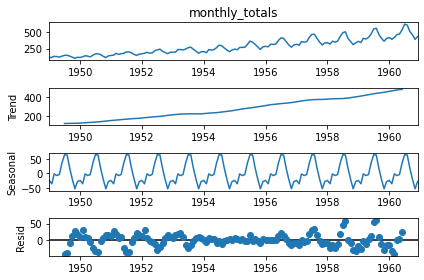

In [12]:
#lets use decomposition to find better description/depth visual of stationary and trend
# we can either use additive or multiplicative
# The additive model is useful when the seasonal variation is relatively constant over time.
# The multiplicative model is useful when the seasonal variation increases over time.

from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df['monthly_totals'], model='additive')
result.plot()

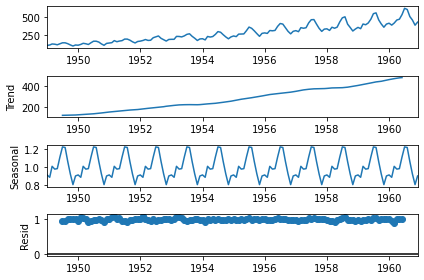

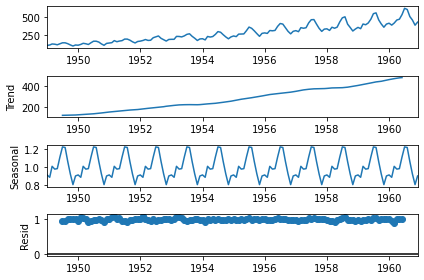

In [13]:
series = df
result = seasonal_decompose(series, model='multiplicative')
result.plot()

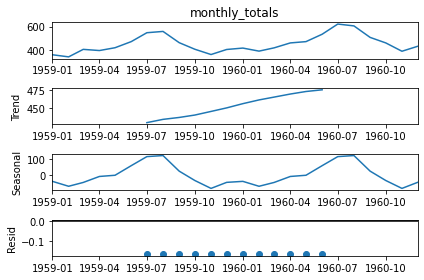

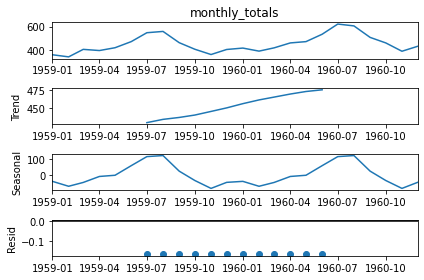

In [14]:
#to find and analyse the trend and season deeply, lets analyse based on months, I am taking 24 months
# now we can find that trend is there between July to July of next year
# and seasonality is between every 10 months from Jan to October. after october there is fall in spike
series1 = df.monthly_totals[-24:]
result = seasonal_decompose(series1, model='additive')
result.plot()

## Noise
How to find Noise/White noise?

Noise mean Random data that has no pattern. If there is no patter then we cannot make a proper prediction.
A time series is white noise if the variables are independent and identically distributed with a mean of zero.

We can check Noise using below steps. If any one of the condition meets, then its a white noise.
* Check histogram, does it look like a Gaussian distribution? Mean=0 and constant std
* Correlation plots
* Standard deviation distribution, is it a Gaussian distribution?
* Does the mean or level change over time?

Text(0.5, 1.0, 'Mean over time')

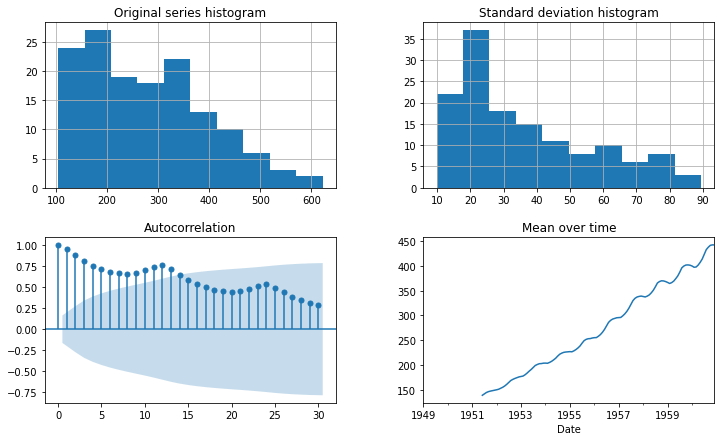

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = df.monthly_totals.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = df.monthly_totals.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

What we found from above graph?

* Check histogram, does it look like a Gaussian distribution? Mean=0 and constant std  --- No, its not Gaussian
* Correlation plots -  Auto correlation is not close to zero, so its not a white noise
* Standard deviation distribution, is it a Gaussian distribution? No, its not
* Does the mean or level change over time? Yes, the mean/ level changes over time. So Not a white noise

# Stationary
* A time series is stationarity if it has constant mean and variance over time.
* Most models work only with stationary data as this makes it easier to model. Not all time series are stationary but we can transform them into stationary series in different ways.

## Check for Stationarity

* Dickey-fuller test
* The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. lets use the Dickey-Fuller test and do hypothesis based on p value 0.05

In [16]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['monthly_totals'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(totals):
    result=adfuller(totals)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['monthly_totals'])

ADF Test Statistic : 0.8153688792060433
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


* So it is confirmed that we have a non-stationary data
# What makes our current series non stationary?

* Trend - The mean for our series is not constant, it increases over time and

* Seasonality - The values of our series vary over time with an specific pattern that repeats over time, this is called seasonalities

Now we have to remove or smoothen the data by removing trend and seasonality components, so that we can get good predictions
# Making our time series stationary
* we have to make our data stationary so that it can be fed into time series model
* there are several methods to make our data stationary like differencing, log scale, smoothing, moving average.
* lets  use differencing to make our data stationary, its enough for now to understand this concept

difference(t) = observation(t) - observation(t-1)

Taking the difference between consecutive observations would be a lag-1 difference, we can tweek this lag value to fit our series.

We can also apply differencing transforms consecutively in the same series if the temporal effect hasnt been removed yet. This is called multiple order difference transform

In [19]:
df['monthly_totals First Difference'] = df['monthly_totals'] - df['monthly_totals'].shift(1)

In [20]:
df['monthly_totals'].shift(1)
#when we use shift(1) this is what the data will look like

Date
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: monthly_totals, Length: 144, dtype: float64

In [21]:
df['seasonal First Difference'] = df['monthly_totals'] - df['monthly_totals'].shift(12)

In [22]:
df.head()

,monthly_totals,monthly_totals First Difference,seasonal First Difference
Date,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,NaN
1949-05-01,121.0,-8.0,NaN


In [23]:
# Now lets check whether the data became stationary after differencing 

adfuller_test(df['seasonal First Difference'].dropna())

# Yess the data is now stationary

ADF Test Statistic : -3.3830207264924814
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

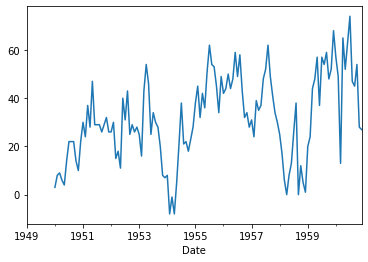

In [24]:
#lets plot this now
df['seasonal First Difference'].plot()

# now you can see that we have treated the trend and seasonality. now it looks somewhat stationary, not a perfect though, still its fine.
#  you can you any number instead of shift(12), tune it and see the stationarity of data

* now the data is ready to be fed into the model
* Before feeding the data into the model like arima, sarimax etc, we have to find few parameters(p,q,d)
* these are parameters used in the model.
* this can be found through autocorrelation plots, acf and pacf
# Autocorrelation plots

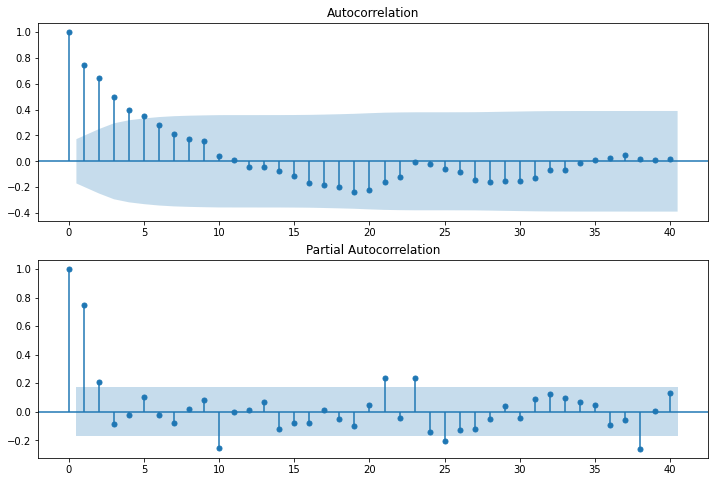

In [25]:
# Here lags we can tune it, based on requirement. Lag is a fixed amount of passing time like t-1, t-2, t-3 etc.
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


* p - Auto regressive - pacf
* q - Moving average - acf
* Now how to decide p and q value from the pacf and acf?

here in the above diagram see that acf and pacf highlighted with a curve or a wave.

* Always note that in acf, the wave starts and then there is exponentioal decrease, not a sudden decrease.
* In pacf, there will be usually a sudden decrease, the decrease will not be slow.

* so check acf at what point does there is exponential decrease? 9 or 10 right? so q = 9
* and pacf  - p value is 2 or 3
* d is the difference, we just did only one difference, i.e shift difference(12) so d=1
Note we are using column that was made stationary for plotting acf and pacf. So we will use sarimax model to make prediction

In [26]:
model=sm.tsa.statespace.SARIMAX(df['monthly_totals'],order=(3, 1, 9),seasonal_order=(1,1,1,12))
results=model.fit()

c:\users\punnmoha\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\punnmoha\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\punnmoha\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

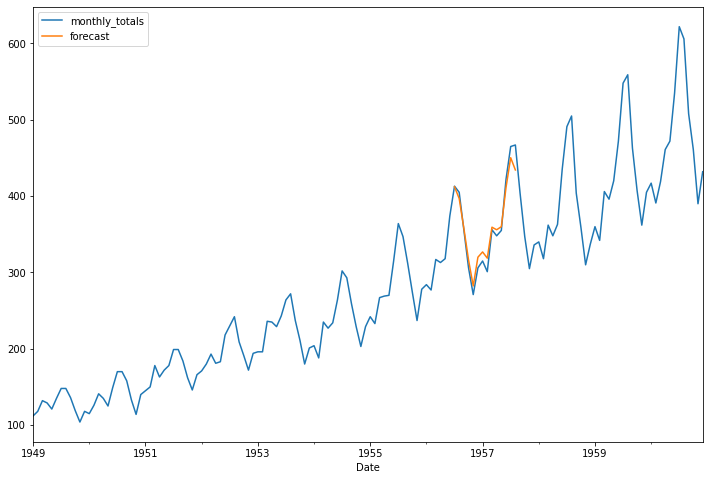

In [27]:
df1 = df.copy()
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['monthly_totals','forecast']].plot(figsize=(12,8))

Happy,Finally the prediction seems good.

In the next post I will be describing several Time series model. Please do check if you like my work

please comments for feedback or query so that I can improve